# **🍽️ Restaurant Tips Analysis**

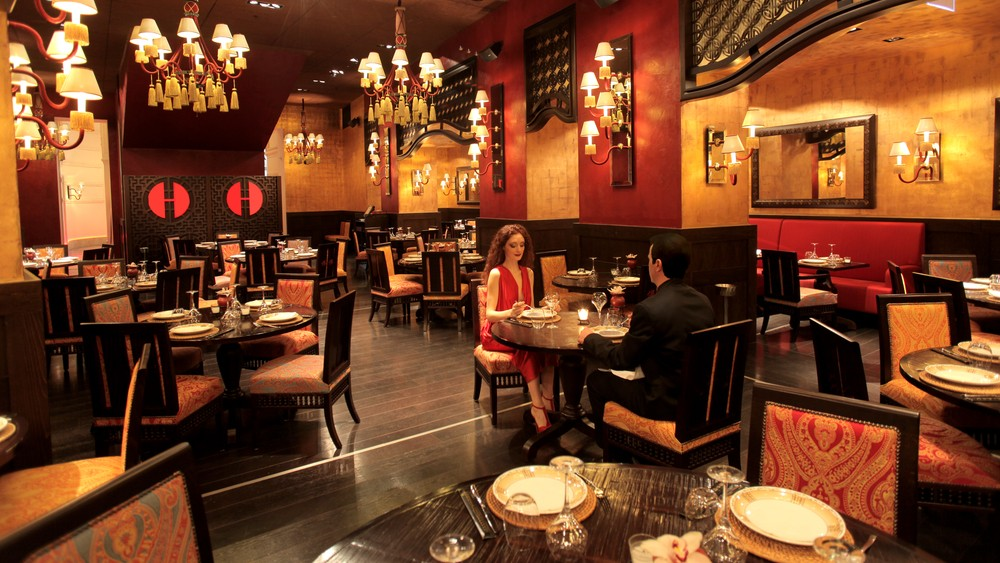

This project aims to use the restaurant tips dataset to practice creating composition plots and visualizations. We will examine the relationship between different variables and the tips given.

The dataset consists of information from 244 restaurant bills, collected in the US in 1987.

It includes details about the tips given to restaurant staff, such as the total bill, tip amount, gender of the person paying, smoking status, day of the week, time of day, and party size.

## **👣 The First Steps**

### **📥 Data import**

First, let's import the needed libraries: Pandas & Matplotlib.

In [2]:
# PUT YOUR CODE HERE
import pandas as pd
import matplotlib.pyplot as plt

Then load data from the following link: https://raw.githubusercontent.com/RusAbk/sca_datasets/main/tips.csv

In [3]:
# PUT YOUR CODE HERE
df = pd.read_csv('https://raw.githubusercontent.com/RusAbk/sca_datasets/main/tips.csv')

### **🔍 Data exploration**

#### **Test sample**

Let's take a look at the first 5 rows to be sure, that data is loaded properly:

In [4]:
# PUT YOUR CODE HERE
df.head()

,id,total_bill,tip,sex,smoker,day,time,size
0,0,16.99,1.01,Female,No,Sun,Dinner,2
1,1,10.34,1.66,Male,No,Sun,Dinner,3
2,2,21.01,3.50,Male,No,Sun,Dinner,3
3,3,23.68,3.31,Male,No,Sun,Dinner,2
4,4,24.59,3.61,Female,No,Sun,Dinner,4


> 🎉 Great! It seems to be okay.

As you can see each observation represents a customer who left a tip at a restaurant.

We can see information about:
* the day it occurred
* if it was at lunch or dinner
* the total bill
* the sex of the person
* if they were a smoker or not
* the size of the party

Before continuing take a look at a few rows of the data and use `info` and `describe` to analyze dataset column types and values.

#### **Column types checking**

Show the columns of the dataframe and their types:

In [5]:
# PUT YOUR CODE HERE
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          244 non-null    int64  
 1   total_bill  244 non-null    float64
 2   tip         244 non-null    float64
 3   sex         244 non-null    object 
 4   smoker      244 non-null    object 
 5   day         244 non-null    object 
 6   time        244 non-null    object 
 7   size        244 non-null    int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 15.4+ KB


> **Ooops... 🤔**
>
> We have string columns considered as objects.

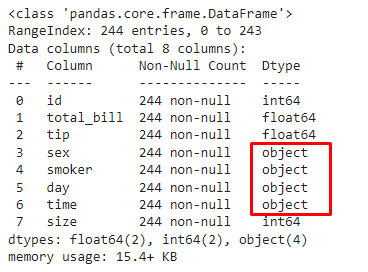

Let's fix their types and make them string:

In [6]:
# PUT YOUR CODE HERE
df1 = df.convert_dtypes()

Check again (output columns and their types):

In [7]:
# PUT YOUR CODE HERE
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          244 non-null    Int64  
 1   total_bill  244 non-null    Float64
 2   tip         244 non-null    Float64
 3   sex         244 non-null    string 
 4   smoker      244 non-null    string 
 5   day         244 non-null    string 
 6   time        244 non-null    string 
 7   size        244 non-null    Int64  
dtypes: Float64(2), Int64(2), string(4)
memory usage: 16.3 KB


Nice! We finished this. Look like we are ready to explore some statistics on the given data.

#### **Basic descriptive statistics**

Show a descriptive statistics of the numeric columns:

In [8]:
# PUT YOUR CODE HERE
df1.describe()

,id,total_bill,tip,size
count,244.0,244.0,244.0,244.0
mean,121.5,19.785943,2.998279,2.569672
std,70.580923,8.902412,1.383638,0.9511
min,0.0,3.07,1.0,1.0
25%,60.75,13.3475,2.0,2.0
50%,121.5,17.795,2.9,2.0
75%,182.25,24.1275,3.5625,3.0
max,243.0,50.81,10.0,6.0


Great! Now we know a little more about our data.

➡️ Let's move forward!

## **💸 Tip value influencers**

### **🚬 Do people who smoke give more tips?**

Let's figure out the difference between smokers and non-smokers in terms of their behavior and purchasing habits in public catering establishments.

#### **Separate smokers and non-smokers**

Create a new dataframe `smokers_df` containing only info about smokers.

In [9]:
# PUT YOUR CODE HERE
smokers_df = df1.query('smoker == "Yes"')

#smokers_df = df1[df1['smoker'] == 'Yes']

Check whether everything is okay. Output a test sample (5 random rows):

In [10]:
# PUT YOUR CODE HERE
smokers_df.sample(5)

,id,total_bill,tip,sex,smoker,day,time,size
203,203,16.4,2.5,Female,Yes,Thur,Lunch,2
234,234,15.53,3.0,Male,Yes,Sat,Dinner,2
63,63,18.29,3.76,Male,Yes,Sat,Dinner,4
170,170,50.81,10.0,Male,Yes,Sat,Dinner,3
236,236,12.6,1.0,Male,Yes,Sat,Dinner,2


Also create another one dataframe `non_smokers_df` containing only non-smokers.

In [11]:
# PUT YOUR CODE HERE
non_smokers_df = df1.query('smoker == "No"')

Check whether everything is okay. Output a test sample (5 random rows):

In [12]:
# PUT YOUR CODE HERE
non_smokers_df.sample(5)

,id,total_bill,tip,sex,smoker,day,time,size
39,39,31.27,5.0,Male,No,Sat,Dinner,3
17,17,16.29,3.71,Male,No,Sun,Dinner,3
23,23,39.42,7.58,Male,No,Sat,Dinner,4
4,4,24.59,3.61,Female,No,Sun,Dinner,4
65,65,20.08,3.15,Male,No,Sat,Dinner,3


#### **Compare their measures of central tendency**

As we know, measures of central tendency is one of the basic tools, that allow us to compare different datasets as it shows the most typical values.

##### **🌏 Whole dataset**

Let's try to calculate measures of central tendency for the whole dataset first.

Calculate them for the **'tip'** column through the whole dataset and save them into the following variables:

* min => `common_tip_min`
* max => `common_tip_max`
* mean => `common_tip_mean`
* median => `common_tip_median`

In [51]:
# YOUR CODE
common_tip_min = df1['tip'].min()
common_tip_max = df1['tip'].max()
common_tip_mean = df1['tip'].mean()
common_tip_median = df1['tip'].median()

Let's show the resulting values for whole dataset (we already have the code written for you 😉)

In [52]:
# Make a list of values
common_values = [common_tip_min, common_tip_max, common_tip_mean, common_tip_median]
# Round all the values to 4 decimal places
common_values = map(lambda x: round(x, 4), common_values)

# Make a dataframe from the list
common_mct = pd.DataFrame(common_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
common_mct

,0
min,1.0000
max,10.0000
mean,2.9983
median,2.9000


##### **🚬 Smokers**

Do the same taking into account only smokers. Use the following variables:

* min => `smokers_tip_min`
* max => `smokers_tip_max`
* mean => `smokers_tip_mean`
* median => `smokers_tip_median`

In [15]:
# YOUR CODE
smokers_tip_min = smokers_df.tip.min()
smokers_tip_max = smokers_df.tip.max()
smokers_tip_mean = smokers_df.tip.mean()
smokers_tip_median = smokers_df.tip.median()

Let's output the results in the same format.

Make the same dataframe containing the measures of central tendency for smokers as we did for whole dataset. Then output it.

In [16]:
# YOUR CODE
# Make a list of values
smokers_values = [smokers_tip_min, smokers_tip_max, smokers_tip_mean, smokers_tip_median]
# Round all the values to 4 decimal places
smokers_values = map(lambda x: round(x, 4), smokers_values)

# Make a dataframe from the list
smokers_mct = pd.DataFrame(smokers_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
smokers_mct

,0
min,1.0000
max,10.0000
mean,3.0087
median,3.0000


##### **🚭 Non-smokers**

Now repeat it for non-smokers. Use the following variables:

* min => `non_smokers_tip_min`
* max => `non_smokers_tip_max`
* mean => `non_smokers_tip_mean`
* median => `non_smokers_tip_median`

In [17]:
# YOUR CODE
non_smokers_tip_min = non_smokers_df.tip.min()
non_smokers_tip_max = non_smokers_df.tip.max()
non_smokers_tip_mean = non_smokers_df.tip.mean()
non_smokers_tip_median = non_smokers_df.tip.median()

Make the same dataframe containing the measures of central tendency for non-smokers as we did for whole dataset. Then output it.

In [18]:
# YOUR CODE
# Make a list of values
non_smokers_values = [non_smokers_tip_min, non_smokers_tip_max, non_smokers_tip_mean, non_smokers_tip_median]
# Round all the values to 4 decimal places
non_smokers_values = map(lambda x: round(x, 4), non_smokers_values)

# Make a dataframe from the list
non_smokers_mct = pd.DataFrame(non_smokers_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
non_smokers_mct

,0
min,1.0000
max,9.0000
mean,2.9919
median,2.7400


##### **📝 Conclusion**

Let's show the retrieved results together (we already have the code written for you 😉):

In [19]:
all_vals_dict = {
    'Common': {'min': common_tip_min, 'max': common_tip_max, 'mean': common_tip_mean, 'median': common_tip_median},
    'Smokers': {'min': smokers_tip_min, 'max': smokers_tip_max, 'mean': smokers_tip_mean, 'median': smokers_tip_median},
    'Non-smokers': {'min': non_smokers_tip_min, 'max': non_smokers_tip_max, 'mean': non_smokers_tip_mean, 'median': non_smokers_tip_median}
}

# Make a dataframe
all_mct = pd.DataFrame(all_vals_dict)
# Output the dataframe
all_mct

,Common,Smokers,Non-smokers
min,1.000000,1.00000,1.000000
max,10.000000,10.00000,9.000000
mean,2.998279,3.00871,2.991854
median,2.900000,3.00000,2.740000


**Insights based on measures of central tendency comparison:**

---

1. Smokers have given the highest observed tip (10.00 bucks) while Non-smokers have a lower max tip (9.00 bucks), but the difference is small.
2. The mean tip is slightly higher for smokers than for non-smokers. However, the difference is very small (~1.7 cents), suggesting no strong effect of smoking status on average tip amount.

**General conclusion:**
* Smokers tend to tip a bit more on average & may have more consistent tipping patterns at moderate-to-high levels.
* Non-smokers being lower median tip suggests more small tippers &possibly a wider or left-skewed distribution.

#### **Look at histograms**

As we already discussed on the last lecture, there are a lot of cases, when comparing the measures of central tendency is not enough.

This is because they only show the most typical values. However, the way data is distributed is equally important. There are situations where measures of central tendency are exactly the same, but due to different distributions, it is incorrect to say that the datasets are similar.

##### **🌏 Whole dataset tips histogram**

Plot the histogram for the whole dataset tips distribution.

<u>Use the following settings:</u>
* Size: `15 x 5`
* Color: `#74b9ff`
* X-axis label: `Tip value`
* Y-axis label: `Frequency`
* Chart title: `Whole dataset tip values`
* Gridlines: `show`

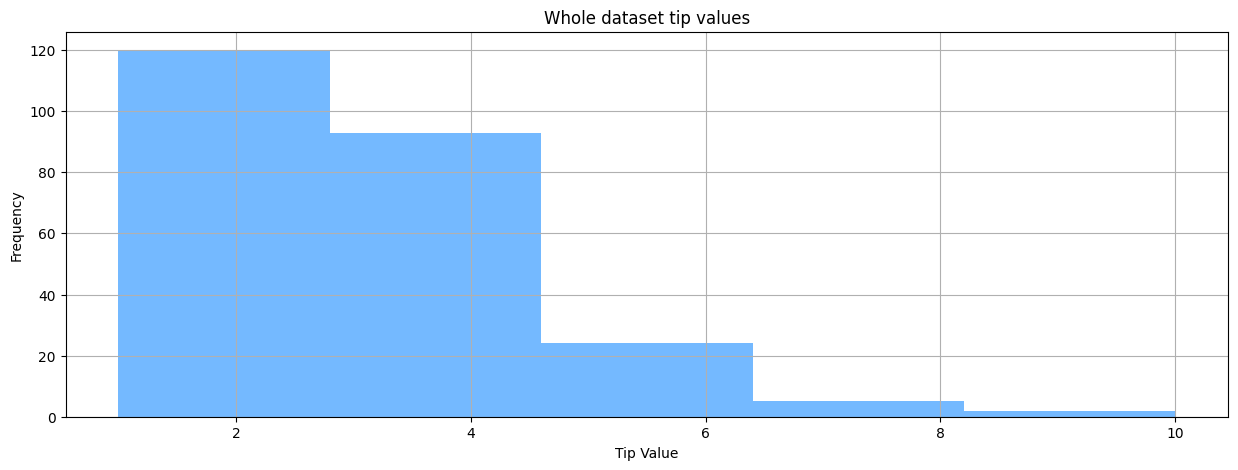

In [20]:
# YOUR CODE
plt.figure(figsize=(15,5))

plt.hist(df1.tip, bins=5, color='#74b9ff')

plt.xlabel('Tip Value')
plt.ylabel('Frequency')
plt.title('Whole dataset tip values')

plt.grid(True)
plt.show()

##### **🚬 Smokers tips histogram**

Plot the histogram for smokers tips distribution.

<u>Use the following settings:</u>
* Size: `15 x 5`
* Color: `#ff7675`
* X-axis label: `Tip value`
* Y-axis label: `Frequency`
* Chart title: `Smokers tip values`
* Gridlines: `show`

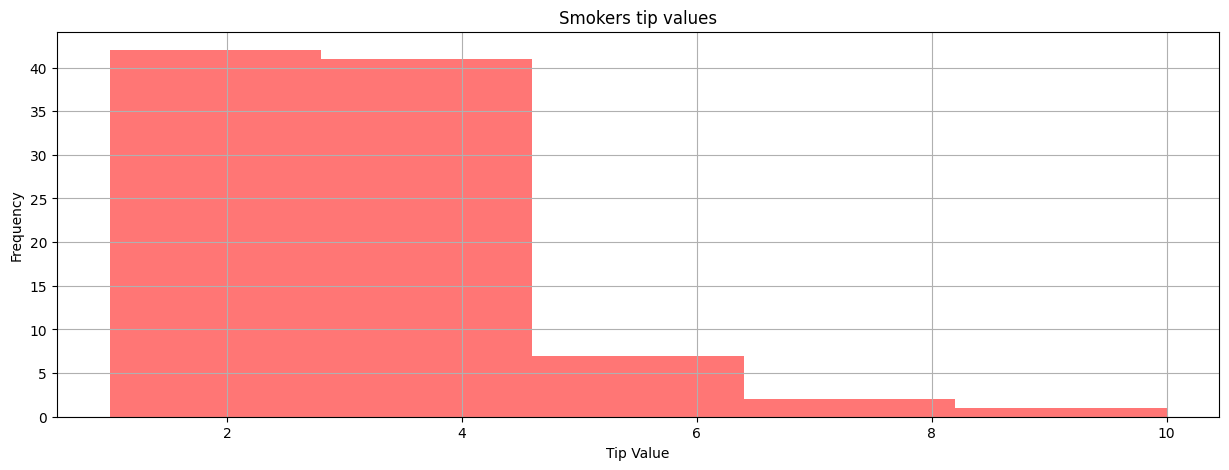

In [21]:
# YOUR CODE
plt.figure(figsize=(15,5))

plt.hist(smokers_df.tip, bins=5, color='#ff7675')

plt.xlabel('Tip Value')
plt.ylabel('Frequency')
plt.title('Smokers tip values')

plt.grid(True)
plt.show()

##### **🚭 Non-smokers tips histogram**

Plot the histogram for non-smokers tips distribution.

<u>Use the following settings:</u>
* Size: `15 x 5`
* Color: `#55efc4`
* X-axis label: `Tip value`
* Y-axis label: `Frequency`
* Chart title: `Non-smokers tip values`
* Gridlines: `show`

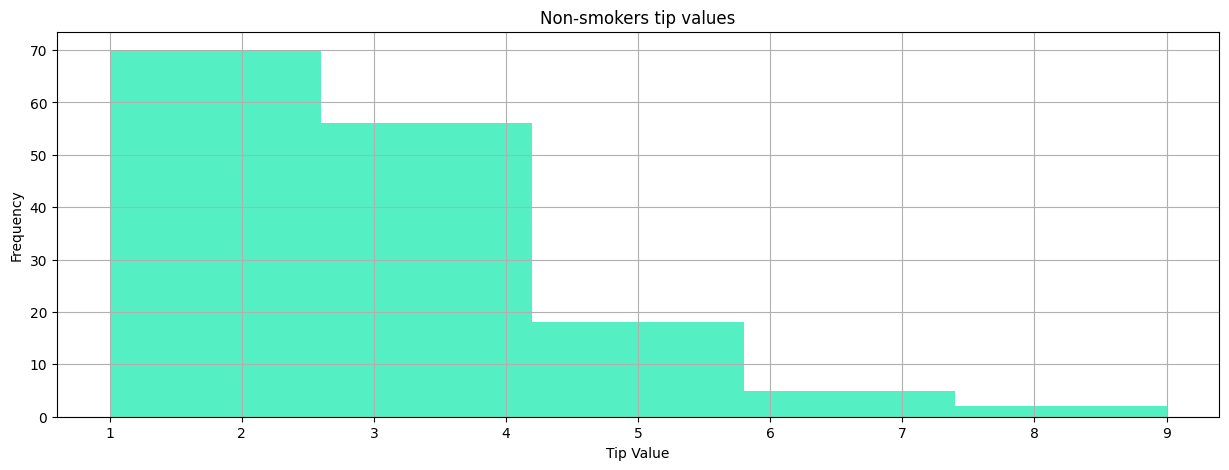

In [22]:
# YOUR CODE
plt.figure(figsize=(15,5))

plt.hist(non_smokers_df.tip, bins=5, color='#55efc4')

plt.xlabel('Tip Value')
plt.ylabel('Frequency')
plt.title('Non-smokers tip values')

plt.grid(True)
plt.show()

##### **⭐ Extra-task with a higher difficulty**

Plot all 3 charts in a row in the same cell:

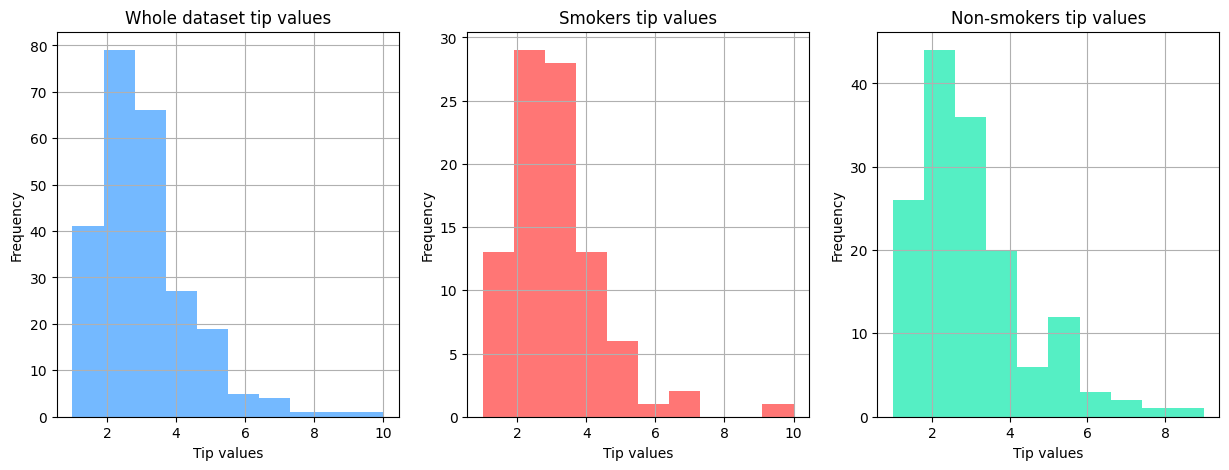

In [23]:
# YOUR CODE HERE
figure, axis = plt.subplots(1, 3, figsize=(15, 5))

axis[0].hist(df1['tip'], color='#74b9ff')
axis[0].set_xlabel('Tip values')
axis[0].set_ylabel('Frequency')
axis[0].set_title('Whole dataset tip values')
axis[0].grid(True)

axis[1].hist(smokers_df['tip'], color='#ff7675')
axis[1].set_xlabel('Tip values')
axis[1].set_ylabel('Frequency')
axis[1].set_title('Smokers tip values')
axis[1].grid(True)

axis[2].hist(non_smokers_df['tip'], color='#55efc4')
axis[2].set_xlabel('Tip values')
axis[2].set_ylabel('Frequency')
axis[2].set_title('Non-smokers tip values')
axis[2].grid(True)

plt.show()

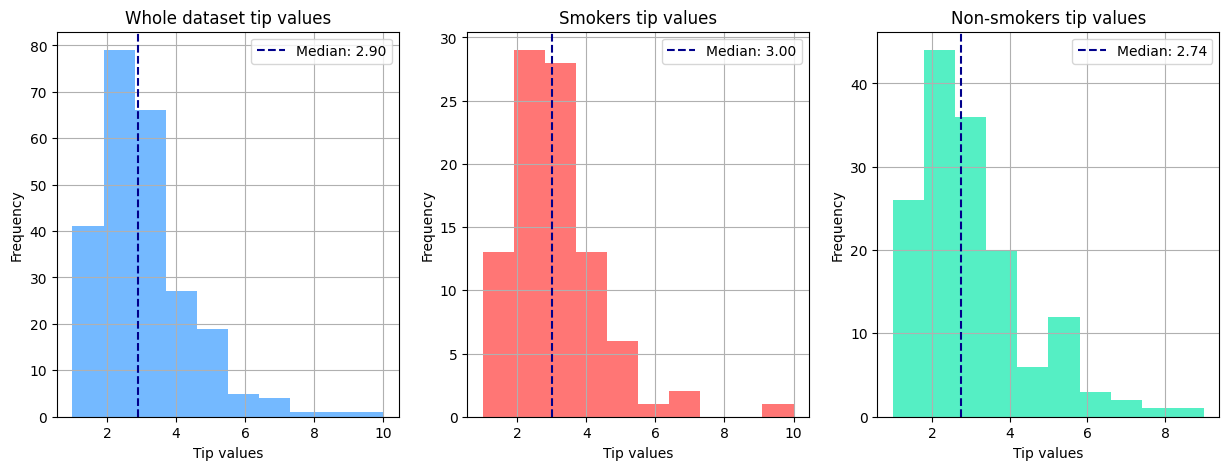

In [24]:
# ADDING THE MEDIAN LINE

figure, axis = plt.subplots(1, 3, figsize=(15, 5))

axis[0].hist(df1['tip'], color='#74b9ff')
axis[0].axvline(df1['tip'].median(), color='darkblue', linestyle='--', label=f'Median: {df1["tip"].median():.2f}')
axis[0].set_xlabel('Tip values')
axis[0].set_ylabel('Frequency')
axis[0].set_title('Whole dataset tip values')
axis[0].grid(True)
axis[0].legend()

axis[1].hist(smokers_df['tip'], color='#ff7675')
axis[1].axvline(smokers_df['tip'].median(), color='darkblue', linestyle='--', label=f'Median: {smokers_df["tip"].median():.2f}')
axis[1].set_xlabel('Tip values')
axis[1].set_ylabel('Frequency')
axis[1].set_title('Smokers tip values')
axis[1].grid(True)
axis[1].legend()

axis[2].hist(non_smokers_df['tip'], color='#55efc4')
axis[2].axvline(non_smokers_df['tip'].median(), color='darkblue', linestyle='--', label=f'Median: {non_smokers_df["tip"].median():.2f}')
axis[2].set_xlabel('Tip values')
axis[2].set_ylabel('Frequency')
axis[2].set_title('Non-smokers tip values')
axis[2].grid(True)
axis[2].legend()

plt.show()

##### **📝 Conclusion**

**Insights based on distribution comparison:**

---

1. Smokers' tips might show a tighter concentration around lower values.
2. Non-smokers' tips likely have a wider spread, potentially with a longer right tail.
**General conclusion:**
* Smokers' tips being less variability & tipping behavior more consistently on the lower side.
* Non-smokers' tips being occasional larger tips & more diverse tipping behavior.

### **👨👩 Do males give more tips?**

Perform the same steps based on the column **sex**.

Let's figure out the difference between males and females in terms of their behavior and purchasing habits in public catering establishments.

#### **Separate smokers and non-smokers**

Create a new dataframe `male_df` containing only info about males.

In [45]:
# PUT YOUR CODE HERE
male_df = df1.query('sex == "Male"')

#male_df = df1[df1['sex'] == 'Male']

Check whether everything is okay. Output a test sample (5 random rows):

In [46]:
male_df.sample(5)

,id,total_bill,tip,sex,smoker,day,time,size
227,227,20.45,3.0,Male,No,Sat,Dinner,4
41,41,17.46,2.54,Male,No,Sun,Dinner,2
208,208,24.27,2.03,Male,Yes,Sat,Dinner,2
220,220,12.16,2.2,Male,Yes,Fri,Lunch,2
50,50,12.54,2.5,Male,No,Sun,Dinner,2


Also create another one dataframe female_df containing only females.

In [43]:
# PUT YOUR CODE HERE
female_df = df1.query('sex == "Female"')

#female_df = df1[df1['sex'] == 'Female']

Check whether everything is okay. Output a test sample (5 random rows):

In [44]:
female_df.sample(5)

,id,total_bill,tip,sex,smoker,day,time,size
119,119,24.08,2.92,Female,No,Thur,Lunch,4
157,157,25.0,3.75,Female,No,Sun,Dinner,4
29,29,19.65,3.0,Female,No,Sat,Dinner,2
115,115,17.31,3.5,Female,No,Sun,Dinner,2
32,32,15.06,3.0,Female,No,Sat,Dinner,2


#### **Compare their measures of central tendency**

As we know, measures of central tendency is one of the basic tools, that allow us to compare different datasets as it shows the most typical values.

##### **🌏 Whole dataset**

Let's try to calculate measures of central tendency for the whole dataset first.

Calculate them for the **'tip'** column through the whole dataset and save them into the following variables:

* min => `common_tip_min`
* max => `common_tip_max`
* mean => `common_tip_mean`
* median => `common_tip_median`

In [55]:
# YOUR CODE
common_tip_min = df1['tip'].min()
common_tip_max = df1['tip'].max()
common_tip_mean = df1['tip'].mean()
common_tip_median = df1['tip'].median()

Let's show the resulting values for whole dataset (we already have the code written for you 😉)

In [56]:
# Make a list of values
common_values = [common_tip_min, common_tip_max, common_tip_mean, common_tip_median]
# Round all the values to 4 decimal places
common_values = map(lambda x: round(x, 4), common_values)

# Make a dataframe from the list
common_mct = pd.DataFrame(common_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
common_mct

,0
min,1.0000
max,10.0000
mean,2.9983
median,2.9000


##### **👨 Males**

Do the same taking into account only males. Use the following variables:

* min => `male_tip_min`
* max => `male_tip_max`
* mean => `male_tip_mean`
* median => `male_tip_median`

In [57]:
# YOUR CODE
male_tip_min = male_df.tip.min()
male_tip_max = male_df.tip.max()
male_tip_mean = male_df.tip.mean()
male_tip_median = male_df.tip.median()

Let's output the results in the same format.

Make the same dataframe containing the measures of central tendency for males as we did for whole dataset. Then output it.

In [58]:
# YOUR CODE
# Make a list of values
male_values = [male_tip_min, male_tip_max, male_tip_mean, male_tip_median]
# Round all the values to 4 decimal places
male_values = map(lambda x: round(x, 4), male_values)

# Make a dataframe from the list
male_mct = pd.DataFrame(male_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
male_mct

,0
min,1.0000
max,10.0000
mean,3.0896
median,3.0000


##### **👩 Females**

Now repeat it for females. Use the following variables:

* min => female_tip_min
* max => female_tip_max
* mean => female_tip_mean
* median => female_tip_median

In [59]:
# YOUR CODE
female_tip_min = female_df.tip.min()
female_tip_max = female_df.tip.max()
female_tip_mean = female_df.tip.mean()
female_tip_median = female_df.tip.median()

Make the same dataframe containing the measures of central tendency for females as we did for whole dataset. Then output it.

In [60]:
# YOUR CODE
# Make a list of values
female_values = [female_tip_min, female_tip_max, female_tip_mean, female_tip_median]
# Round all the values to 4 decimal places
female_values = map(lambda x: round(x, 4), female_values)

# Make a dataframe from the list
female_mct = pd.DataFrame(female_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
female_mct

,0
min,1.0000
max,6.5000
mean,2.8334
median,2.7500


##### **📝 Conclusion**

Let's show the retrieved results together (we already have the code written for you 😉):

In [61]:
all_vals_dict = {
    'Common': {'min': common_tip_min, 'max': common_tip_max, 'mean': common_tip_mean, 'median': common_tip_median},
    'Males': {'min': male_tip_min, 'max': male_tip_max, 'mean': male_tip_mean, 'median': male_tip_median},
    'Females': {'min': female_tip_min, 'max': female_tip_max, 'mean': female_tip_mean, 'median': female_tip_median}
}

# Make a dataframe
all_mct = pd.DataFrame(all_vals_dict)
# Output the dataframe
all_mct

,Common,Males,Females
min,1.000000,1.000000,1.000000
max,10.000000,10.000000,6.500000
mean,2.998279,3.089618,2.833448
median,2.900000,3.000000,2.750000


**Insights based on measures of central tendency comparison:**

1. Males have a higher maximum tip value (10.00 bucks) than females (6.50 bucks), indicating that the largest tips are more likely to come from male customers.
2. Males tip average 3.09 bucks, which is about 26 cents higher than from females (2.83 bucks). This suggests that on average, males tend to tip more than females

**General conclusion:**
* Males tip more than females, both on average (mean) and typically (median). The highest tips are given by males, extending up to 10 bucks.
* Females have a tighter tipping range, maxing out at 6.50 bucks — suggesting less variance and fewer outliers.

#### **Look at histograms**

As we already discussed on the last lecture, there are a lot of cases, when comparing the measures of central tendency is not enough.

This is because they only show the most typical values. However, the way data is distributed is equally important. There are situations where measures of central tendency are exactly the same, but due to different distributions, it is incorrect to say that the datasets are similar.

##### **🌏 Whole dataset tips histogram**

Plot the histogram for the whole dataset tips distribution.

<u>Use the following settings:</u>
* Size: `15 x 5`
* Color: `#74b9ff`
* X-axis label: `Tip value`
* Y-axis label: `Frequency`
* Chart title: `Whole dataset tip values`
* Gridlines: `show`

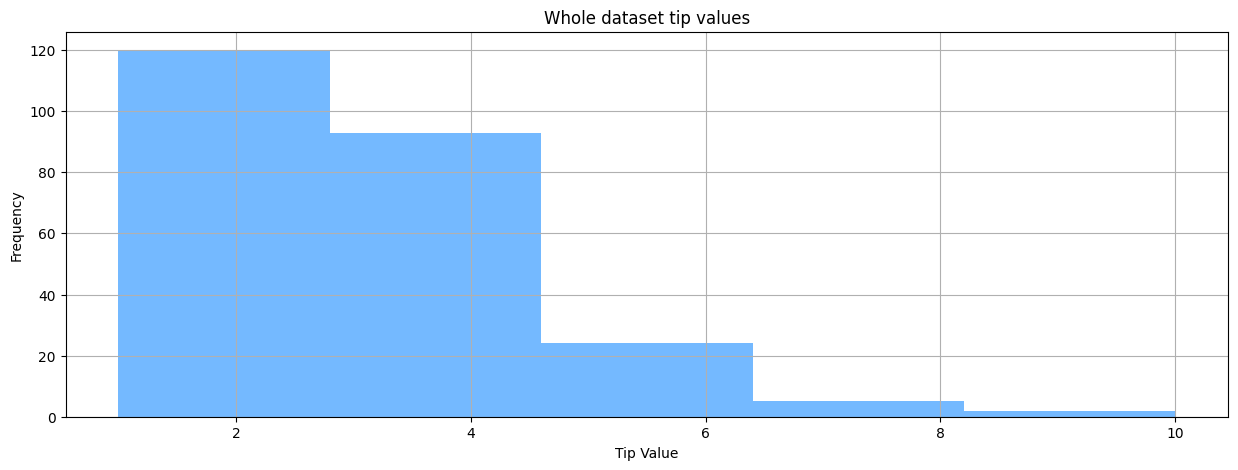

In [62]:
# YOUR CODE
plt.figure(figsize=(15,5))

plt.hist(df1.tip, bins=5, color='#74b9ff')

plt.xlabel('Tip Value')
plt.ylabel('Frequency')
plt.title('Whole dataset tip values')

plt.grid(True)
plt.show()

##### **👨 Males tips histogram**

Plot the histogram for males tips distribution.

<u>Use the following settings:</u>
* Size: `15 x 5`
* Color: `#55efc4`
* X-axis label: `Tip value`
* Y-axis label: `Frequency`
* Chart title: `Males tip values`
* Gridlines: `show`

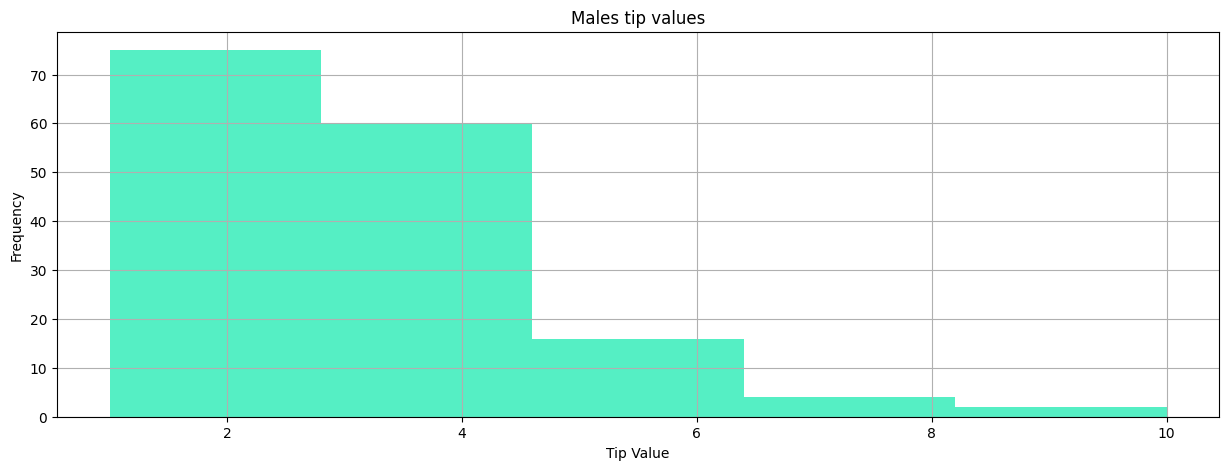

In [65]:
# YOUR CODE
plt.figure(figsize=(15,5))

plt.hist(male_df.tip, bins=5, color='#55efc4')

plt.xlabel('Tip Value')
plt.ylabel('Frequency')
plt.title('Males tip values')

plt.grid(True)
plt.show()

##### **👩  Females tips histogram**

Plot the histogram for females tips distribution.

<u>Use the following settings:</u>
* Size: `15 x 5`
* Color: `#ff7675`
* X-axis label: `Tip value`
* Y-axis label: `Frequency`
* Chart title: `Females tip values`
* Gridlines: `show`

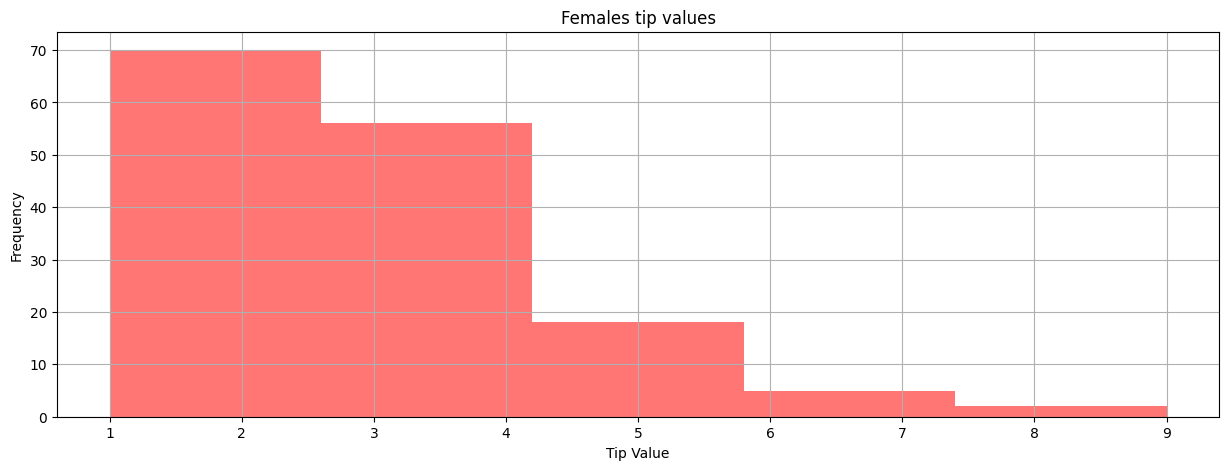

In [66]:
# YOUR CODE
plt.figure(figsize=(15,5))

plt.hist(non_smokers_df.tip, bins=5, color='#ff7675')

plt.xlabel('Tip Value')
plt.ylabel('Frequency')
plt.title('Females tip values')

plt.grid(True)
plt.show()

##### **⭐ Extra-task with a higher difficulty**

Plot all 3 charts in a row in the same cell:

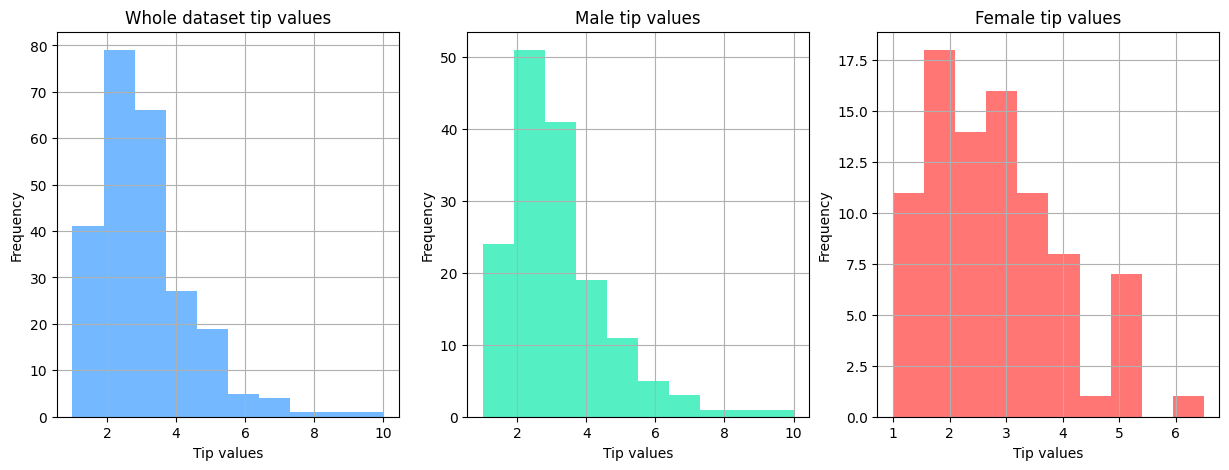

In [74]:
# YOUR CODE

figure, axis = plt.subplots(1, 3, figsize=(15, 5))

axis[0].hist(df1['tip'], color='#74b9ff')
axis[0].set_xlabel('Tip values')
axis[0].set_ylabel('Frequency')
axis[0].set_title('Whole dataset tip values')
axis[0].grid(True)

axis[1].hist(male_df['tip'], color='#55efc4')
axis[1].set_xlabel('Tip values')
axis[1].set_ylabel('Frequency')
axis[1].set_title('Male tip values')
axis[1].grid(True)

axis[2].hist(female_df['tip'], color='#ff7675')
axis[2].set_xlabel('Tip values')
axis[2].set_ylabel('Frequency')
axis[2].set_title('Female tip values')
axis[2].grid(True)

plt.show()

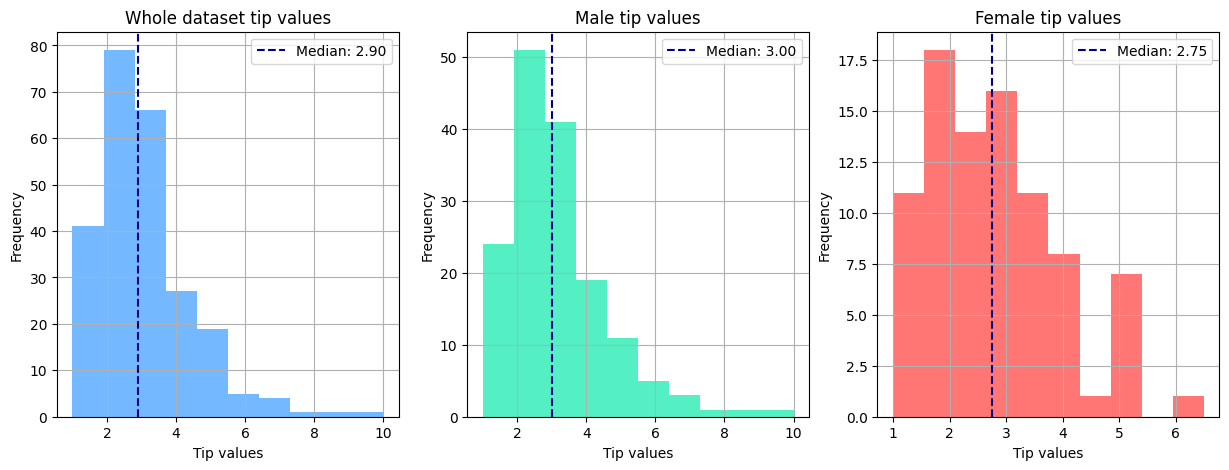

In [73]:
# ADDING THE MEDIAN LINE

figure, axis = plt.subplots(1, 3, figsize=(15, 5))

axis[0].hist(df1['tip'], color='#74b9ff')
axis[0].axvline(df1['tip'].median(), color='darkblue', linestyle='--', label=f'Median: {df1["tip"].median():.2f}')
axis[0].set_xlabel('Tip values')
axis[0].set_ylabel('Frequency')
axis[0].set_title('Whole dataset tip values')
axis[0].grid(True)
axis[0].legend()

axis[1].hist(male_df['tip'], color='#55efc4')
axis[1].axvline(male_df['tip'].median(), color='darkblue', linestyle='--', label=f'Median: {male_df["tip"].median():.2f}')
axis[1].set_xlabel('Tip values')
axis[1].set_ylabel('Frequency')
axis[1].set_title('Male tip values')
axis[1].grid(True)
axis[1].legend()

axis[2].hist(female_df['tip'], color='#ff7675')
axis[2].axvline(female_df['tip'].median(), color='darkblue', linestyle='--', label=f'Median: {female_df["tip"].median():.2f}')
axis[2].set_xlabel('Tip values')
axis[2].set_ylabel('Frequency')
axis[2].set_title('Female tip values')
axis[2].grid(True)
axis[2].legend()

plt.show()

##### **📝 Conclusion**

**Insights based on distribution comparison:**

---

1. The male distribution is more spread out, reaching up to 10 bucks, while the female distribution is narrower, maxing out at 6.50 bucks.
2. Male tips center around 3.00 bucks, while Female tips center slightly lower, around 2.75 bucks.
3. The highest bars (peaks) for females occur at lower tip values, suggesting most women tend to leave modest tips.
4. For males, the bars are more evenly distributed across higher ranges, showing a wider variation and more frequent larger tips.
**General conclusion:**
* Males may dominate the sample size, or their tipping behavior has a stronger influence on the overall pattern
* Males tend to leave higher and more varied tips, while females are more consistent and conservative in tipping

### **📆 Do weekends bring more tips?**

Perform the same steps based on the column **day**.

Let's figure out the difference between weekends and weekdays in terms of tip values in public catering establishments.

#### **Separate weekends and weekdays**

Create a new dataframe `weekend_df` containing only info on weekends.

In [81]:
# PUT YOUR CODE HERE
weekend_df = df1[df1['day'].isin(['Sun', 'Sat'])]

Check whether everything is okay. Output a test sample (5 random rows):

In [82]:
# PUT YOUR CODE HERE
weekend_df.sample(5)

,id,total_bill,tip,sex,smoker,day,time,size
7,7,26.88,3.12,Male,No,Sun,Dinner,4
206,206,26.59,3.41,Male,Yes,Sat,Dinner,3
183,183,23.17,6.5,Male,Yes,Sun,Dinner,4
174,174,16.82,4.0,Male,Yes,Sun,Dinner,2
227,227,20.45,3.0,Male,No,Sat,Dinner,4


Also create another one dataframe weekday_df containing only info on weekdays.

In [84]:
# PUT YOUR CODE HERE
weekday_df = df1[~df1['day'].isin(['Sun', 'Sat'])]

Check whether everything is okay. Output a test sample (5 random rows):

In [86]:
weekday_df.sample(5)

,id,total_bill,tip,sex,smoker,day,time,size
133,133,12.26,2.0,Female,No,Thur,Lunch,2
140,140,17.47,3.5,Female,No,Thur,Lunch,2
141,141,34.3,6.7,Male,No,Thur,Lunch,6
225,225,16.27,2.5,Female,Yes,Fri,Lunch,2
77,77,27.2,4.0,Male,No,Thur,Lunch,4


#### **Compare their measures of central tendency**

As we know, measures of central tendency is one of the basic tools, that allow us to compare different datasets as it shows the most typical values.

##### **🌏 Whole dataset**

Let's try to calculate measures of central tendency for the whole dataset first.

Calculate them for the **'tip'** column through the whole dataset and save them into the following variables:

* min => `common_tip_min`
* max => `common_tip_max`
* mean => `common_tip_mean`
* median => `common_tip_median`

In [87]:
# YOUR CODE
common_tip_min = df1['tip'].min()
common_tip_max = df1['tip'].max()
common_tip_mean = df1['tip'].mean()
common_tip_median = df1['tip'].median()

Let's show the resulting values for whole dataset (we already have the code written for you 😉)

In [88]:
# Make a list of values
common_values = [common_tip_min, common_tip_max, common_tip_mean, common_tip_median]
# Round all the values to 4 decimal places
common_values = map(lambda x: round(x, 4), common_values)

# Make a dataframe from the list
common_mct = pd.DataFrame(common_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
common_mct

,0
min,1.0000
max,10.0000
mean,2.9983
median,2.9000


##### **📆 Weekends**

Do the same taking into account only weekends info. Use the following variables:

* min => `weekend_tip_min`
* max => `weekend_tip_max`
* mean => `weekend_tip_mean`
* median => `weekend_tip_median`

In [89]:
# YOUR CODE
weekend_tip_min = weekend_df.tip.min()
weekend_tip_max = weekend_df.tip.max()
weekend_tip_mean = weekend_df.tip.mean()
weekend_tip_median = weekend_df.tip.median()

Let's output the results in the same format.

Make the same dataframe containing the measures of central tendency for weekends as we did for whole dataset. Then output it.

In [90]:
# YOUR CODE
# Make a list of values
weekend_values = [weekend_tip_min, weekend_tip_max, weekend_tip_mean, weekend_tip_median]
# Round all the values to 4 decimal places
weekend_values = map(lambda x: round(x, 4), weekend_values)

# Make a dataframe from the list
weekend_mct = pd.DataFrame(weekend_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
weekend_mct

,0
min,1.0000
max,10.0000
mean,3.1153
median,3.0000


##### **📆 Weekdays**

Now repeat it for weekdays info. Use the following variables:

* min => `weekday_tip_min`
* max => `weekday_tip_max`
* mean => `weekday_tip_mean`
* median => `weekday_tip_median`

In [91]:
# YOUR CODE
weekday_tip_min = weekday_df.tip.min()
weekday_tip_max = weekday_df.tip.max()
weekday_tip_mean = weekday_df.tip.mean()
weekday_tip_median = weekday_df.tip.median()

Make the same dataframe containing the measures of central tendency for weekdays as we did for whole dataset. Then output it.

In [92]:
# YOUR CODE
# Make a list of values
weekday_values = [weekday_tip_min, weekday_tip_max, weekday_tip_mean, weekday_tip_median]
# Round all the values to 4 decimal places
weekday_values = map(lambda x: round(x, 4), weekday_values)

# Make a dataframe from the list
weekday_mct = pd.DataFrame(weekday_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
weekday_mct

,0
min,1.0000
max,6.7000
mean,2.7628
median,2.5000


##### **📝 Conclusion**

Let's show the retrieved results together (we already have the code written for you 😉):

In [93]:
all_vals_dict = {
    'Common': {'min': common_tip_min, 'max': common_tip_max, 'mean': common_tip_mean, 'median': common_tip_median},
    'Weekends': {'min': weekend_tip_min, 'max': weekend_tip_max, 'mean': weekend_tip_mean, 'median': weekend_tip_median},
    'Weekdays': {'min': weekday_tip_min, 'max': weekday_tip_max, 'mean': weekday_tip_mean, 'median': weekday_tip_median}
}

# Make a dataframe
all_mct = pd.DataFrame(all_vals_dict)
# Output the dataframe
all_mct

,Common,Weekends,Weekdays
min,1.000000,1.000000,1.00000
max,10.000000,10.000000,6.70000
mean,2.998279,3.115276,2.76284
median,2.900000,3.000000,2.50000


**Insights based on measures of central tendency comparison:**

1. Mean tip amount on weekends is 3.12 bucks and but on weekdays is just 2.76 buck. On average, customers tend to tip more on weekends. This may reflect a more relaxed dining experience, higher total bills, or more social/group outings
2. Maximum tip on weekends is 10.00 bucks while it just reaches 6.70 bucks on weekdays. Weekend tips reach higher peak values, possibly due to longer meals or special occasions.

**General conclusion:**
* Tipping behavior is more generous on weekends, both on average and in the middle range (median).
* Restaurants may experience better gratuities during weekend shifts, and staff scheduling or performance incentives might consider this.

#### **Look at histograms**

As we already discussed on the last lecture, there are a lot of cases, when comparing the measures of central tendency is not enough.

This is because they only show the most typical values. However, the way data is distributed is equally important. There are situations where measures of central tendency are exactly the same, but due to different distributions, it is incorrect to say that the datasets are similar.

##### **🌏 Whole dataset tips histogram**

Plot the histogram for the whole dataset tips distribution.

<u>Use the following settings:</u>
* Size: `15 x 5`
* Color: `#74b9ff`
* X-axis label: `Tip value`
* Y-axis label: `Frequency`
* Chart title: `Whole dataset tip values`
* Gridlines: `show`

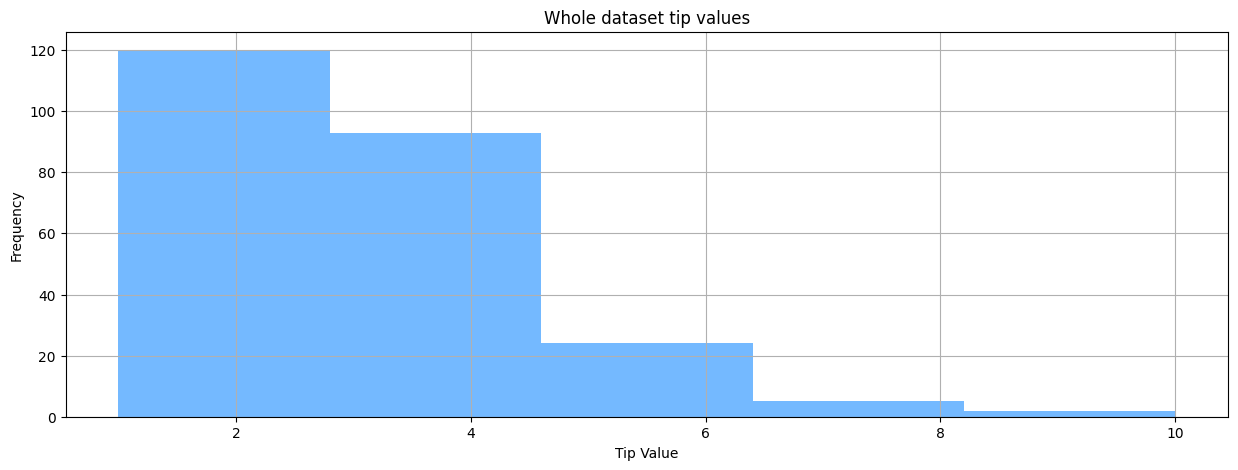

In [94]:
# YOUR CODE
plt.figure(figsize=(15,5))

plt.hist(df1.tip, bins=5, color='#74b9ff')

plt.xlabel('Tip Value')
plt.ylabel('Frequency')
plt.title('Whole dataset tip values')

plt.grid(True)
plt.show()

##### **📆 Weekends tips histogram**

Plot the histogram for weekends tips distribution.

<u>Use the following settings:</u>
* Size: `15 x 5`
* Color: `#ff7675`
* X-axis label: `Tip value`
* Y-axis label: `Frequency`
* Chart title: `Weekends tip values`
* Gridlines: `show`

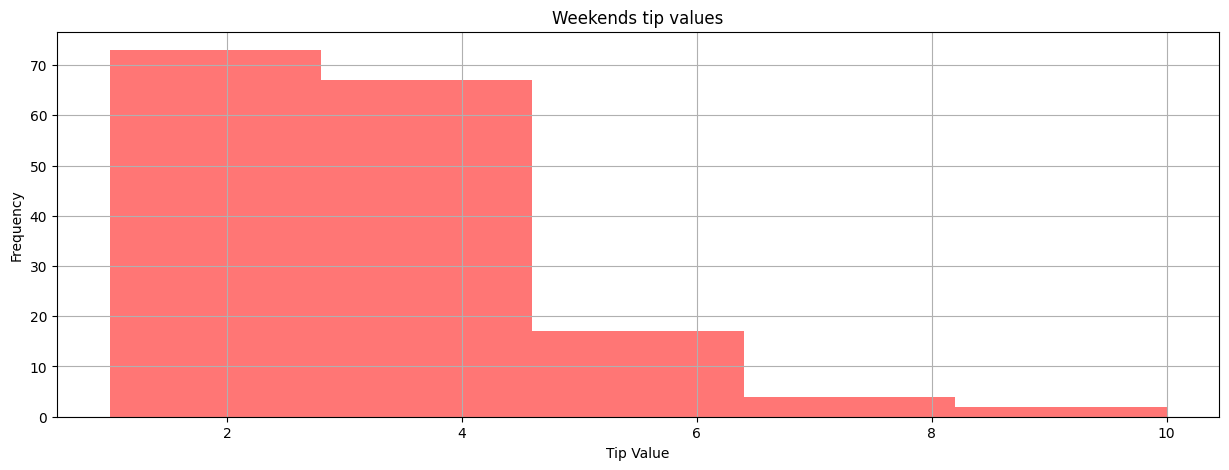

In [97]:
# YOUR CODE
plt.figure(figsize=(15,5))

plt.hist(weekend_df.tip, bins=5, color='#ff7675')

plt.xlabel('Tip Value')
plt.ylabel('Frequency')
plt.title('Weekends tip values')

plt.grid(True)
plt.show()

##### **📆 Weekdays tips histogram**

Plot the histogram for weekdays tips distribution.

<u>Use the following settings:</u>
* Size: `15 x 5`
* Color: `#55efc4`
* X-axis label: `Tip value`
* Y-axis label: `Frequency`
* Chart title: `Weekdays tip values`
* Gridlines: `show`

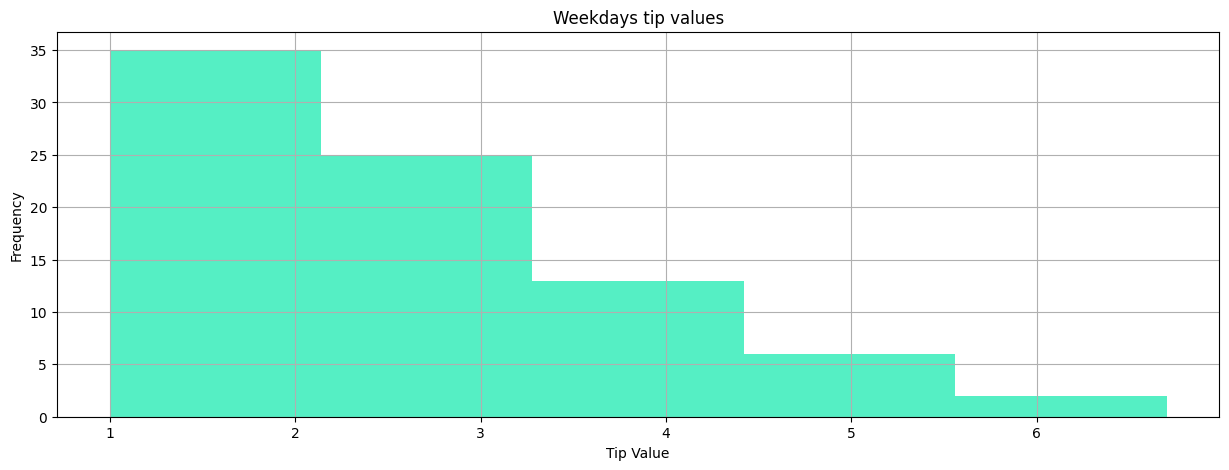

In [96]:
# YOUR CODE
plt.figure(figsize=(15,5))

plt.hist(weekday_df.tip, bins=5, color='#55efc4')

plt.xlabel('Tip Value')
plt.ylabel('Frequency')
plt.title('Weekdays tip values')

plt.grid(True)
plt.show()

##### **⭐ Extra-task with a higher difficulty**

Plot all 3 charts in a row in the same cell:

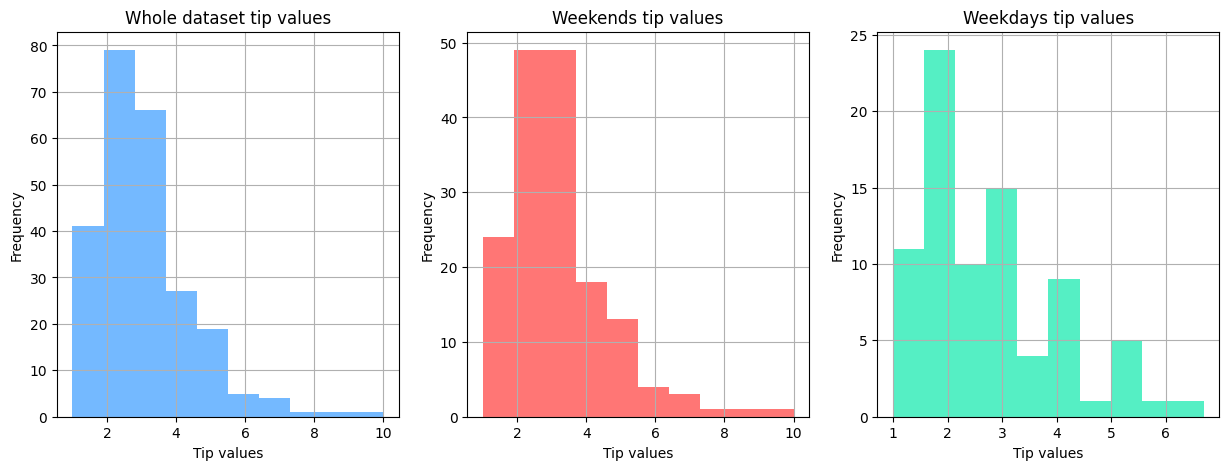

In [99]:
# YOUR CODE HERE

figure, axis = plt.subplots(1, 3, figsize=(15, 5))

axis[0].hist(df1['tip'], color='#74b9ff')
axis[0].set_xlabel('Tip values')
axis[0].set_ylabel('Frequency')
axis[0].set_title('Whole dataset tip values')
axis[0].grid(True)

axis[1].hist(weekend_df['tip'], color='#ff7675')
axis[1].set_xlabel('Tip values')
axis[1].set_ylabel('Frequency')
axis[1].set_title('Weekends tip values')
axis[1].grid(True)

axis[2].hist(weekday_df['tip'], color='#55efc4')
axis[2].set_xlabel('Tip values')
axis[2].set_ylabel('Frequency')
axis[2].set_title('Weekdays tip values')
axis[2].grid(True)

plt.show()

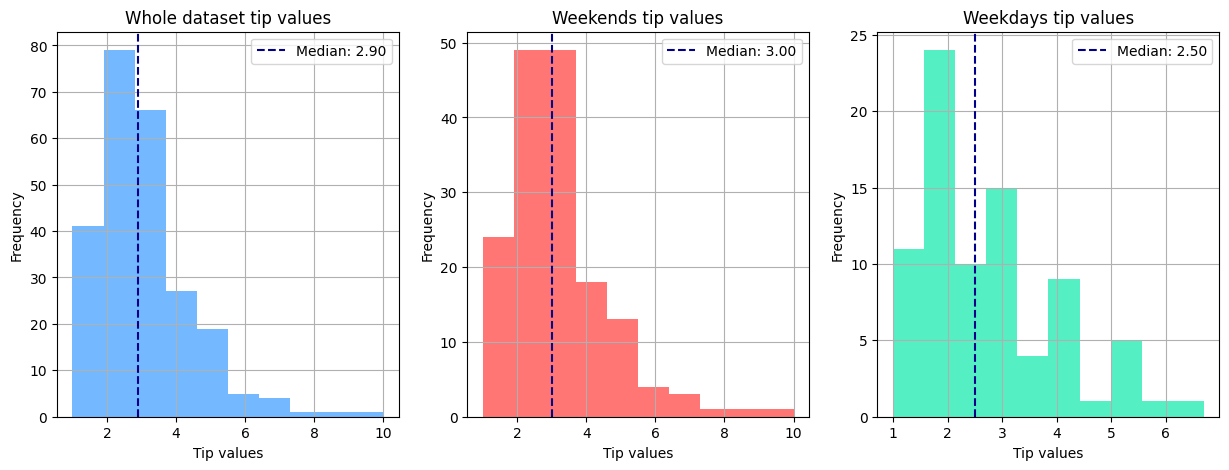

In [104]:
# ADDING THE MEDIAN LINE

figure, axis = plt.subplots(1, 3, figsize=(15, 5))

axis[0].hist(df1['tip'], color='#74b9ff')
axis[0].axvline(df1['tip'].median(), color='darkblue', linestyle='--', label=f'Median: {df1["tip"].median():.2f}')
axis[0].set_xlabel('Tip values')
axis[0].set_ylabel('Frequency')
axis[0].set_title('Whole dataset tip values')
axis[0].grid(True)
axis[0].legend()

axis[1].hist(weekend_df['tip'], color='#ff7675')
axis[1].axvline(weekend_df['tip'].median(), color='darkblue', linestyle='--', label=f'Median: {weekend_df["tip"].median():.2f}')
axis[1].set_xlabel('Tip values')
axis[1].set_ylabel('Frequency')
axis[1].set_title('Weekends tip values')
axis[1].grid(True)
axis[1].legend()

axis[2].hist(weekday_df['tip'], color='#55efc4')
axis[2].axvline(weekday_df['tip'].median(), color='darkblue', linestyle='--', label=f'Median: {weekday_df["tip"].median():.2f}')
axis[2].set_xlabel('Tip values')
axis[2].set_ylabel('Frequency')
axis[2].set_title('Weekdays tip values')
axis[2].grid(True)
axis[2].legend()

plt.show()

##### **📝 Conclusion**

**Insights based on distribution comparison:**

---

1. The maximum tip on weekends reaches 10.00, while it's only 6.70 on weekdays.
2. Both the mean (3.12) and median (3.00) tip values are higher on weekends compared to weekdays. => This suggests that customers tend to tip more generously on weekends.
**General conclusion:**
* Tipping behavior is more generous and varied on weekends.
* Businesses may see higher revenue from tips during the weekend service periods. => Employee scheduling and incentives could be adjusted to reflect this higher-earning potential.

### **🕑 Do dinners bring more tips?**

Perform the same steps based on the column **time**.

Let's figure out the difference between dinners and lunches in terms of tip values in public catering establishments.

#### **Separate dinners and lunches**

Create a new dataframe dinner_df containing only info on dinners.

In [107]:
# PUT YOUR CODE HERE
dinner_df = df1.query('time == "Dinner"')

#dinner_df = df1[df1['time'] == 'Dinner']

Check whether everything is okay. Output a test sample (5 random rows):

In [109]:
# PUT YOUR CODE HERE
dinner_df.sample(5)

,id,total_bill,tip,sex,smoker,day,time,size
54,54,25.56,4.34,Male,No,Sun,Dinner,4
107,107,25.21,4.29,Male,Yes,Sat,Dinner,2
212,212,48.33,9.0,Male,No,Sat,Dinner,4
243,243,18.78,3.0,Female,No,Thur,Dinner,2
210,210,30.06,2.0,Male,Yes,Sat,Dinner,3


Also create another one dataframe lunch_df containing only info on lunches.

In [110]:
# PUT YOUR CODE HERE
lunch_df = df1.query('time == "Lunch"')

#lunch_df = df1[df1['time'] == 'Lunch']

Check whether everything is okay. Output a test sample (5 random rows):

In [111]:
# PUT YOUR CODE HERE
lunch_df.sample(5)

,id,total_bill,tip,sex,smoker,day,time,size
139,139,13.16,2.75,Female,No,Thur,Lunch,2
127,127,14.52,2.0,Female,No,Thur,Lunch,2
222,222,8.58,1.92,Male,Yes,Fri,Lunch,1
86,86,13.03,2.0,Male,No,Thur,Lunch,2
134,134,18.26,3.25,Female,No,Thur,Lunch,2


#### **Compare their measures of central tendency**

As we know, measures of central tendency is one of the basic tools, that allow us to compare different datasets as it shows the most typical values.

##### **🌏 Whole dataset**

Let's try to calculate measures of central tendency for the whole dataset first.

Calculate them for the **'tip'** column through the whole dataset and save them into the following variables:

* min => `common_tip_min`
* max => `common_tip_max`
* mean => `common_tip_mean`
* median => `common_tip_median`

In [112]:
# YOUR CODE
common_tip_min = df1['tip'].min()
common_tip_max = df1['tip'].max()
common_tip_mean = df1['tip'].mean()
common_tip_median = df1['tip'].median()

Let's show the resulting values for whole dataset (we already have the code written for you 😉)

In [113]:
# Make a list of values
common_values = [common_tip_min, common_tip_max, common_tip_mean, common_tip_median]
# Round all the values to 4 decimal places
common_values = map(lambda x: round(x, 4), common_values)

# Make a dataframe from the list
common_mct = pd.DataFrame(common_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
common_mct

,0
min,1.0000
max,10.0000
mean,2.9983
median,2.9000


##### **🕑 Dinners**

Do the same taking into account only dinners info. Use the following variables:

* min => `dinner_tip_min`
* max => `dinner_tip_max`
* mean => `dinner_tip_mean`
* median => `dinner_tip_median`

In [114]:
dinner_tip_min = dinner_df.tip.min()
dinner_tip_max = dinner_df.tip.max()
dinner_tip_mean = dinner_df.tip.mean()
dinner_tip_median = dinner_df.tip.median()


Let's output the results in the same format.

Make the same dataframe containing the measures of central tendency for dinners as we did for whole dataset. Then output it.

In [115]:
# YOUR CODE
# Make a list of values
dinner_values = [dinner_tip_min, dinner_tip_max, dinner_tip_mean, dinner_tip_median]
# Round all the values to 4 decimal places
dinner_values = map(lambda x: round(x, 4), dinner_values)

# Make a dataframe from the list
dinner_mct = pd.DataFrame(dinner_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
dinner_mct

,0
min,1.0000
max,10.0000
mean,3.1027
median,3.0000


##### **🕑 Lunches**

Now repeat it for lunches info. Use the following variables:

* min => `lunch_tip_min`
* max => `lunch_tip_max`
* mean => `lunch_tip_mean`
* median => `lunch_tip_median`

In [116]:
lunch_tip_min = lunch_df.tip.min()
lunch_tip_max = lunch_df.tip.max()
lunch_tip_mean = lunch_df.tip.mean()
lunch_tip_median = lunch_df.tip.median()

Make the same dataframe containing the measures of central tendency for lunches as we did for whole dataset. Then output it.

In [117]:
# YOUR CODE
# Make a list of values
lunch_values = [lunch_tip_min, lunch_tip_max, lunch_tip_mean, lunch_tip_median]
# Round all the values to 4 decimal places
lunch_values = map(lambda x: round(x, 4), lunch_values)

# Make a dataframe from the list
lunch_mct = pd.DataFrame(lunch_values, index=['min', 'max', 'mean', 'median'])
# Output the dataframe
lunch_mct

,0
min,1.2500
max,6.7000
mean,2.7281
median,2.2500


##### **📝 Conclusion**

Let's show the retrieved results together (we already have the code written for you 😉):

In [118]:
all_vals_dict = {
    'Common': {'min': common_tip_min, 'max': common_tip_max, 'mean': common_tip_mean, 'median': common_tip_median},
    'Dinners': {'min': dinner_tip_min, 'max': dinner_tip_max, 'mean': dinner_tip_mean, 'median': dinner_tip_median},
    'Lunches': {'min': lunch_tip_min, 'max': lunch_tip_max, 'mean': lunch_tip_mean, 'median': lunch_tip_median}
}

# Make a dataframe
all_mct = pd.DataFrame(all_vals_dict)
# Output the dataframe
all_mct

,Common,Dinners,Lunches
min,1.000000,1.00000,1.250000
max,10.000000,10.00000,6.700000
mean,2.998279,3.10267,2.728088
median,2.900000,3.00000,2.250000


**Insights based on measures of central tendency comparison:**

1. Both the mean (3.10) and median (3.00) tip amounts are higher during dinner compared to lunch (mean: 2.73, median: 2.25).
2. Dinner tips range from 1.00 to 10.00, while lunch tips top out at 6.70.

**General conclusion:**
* Dinner shifts tend to be more profitable for staff. => Restaurants might consider staffing more experienced servers at dinner, and possibly incentivizing lunch shifts to improve tips.
* Dinner service generally yields higher and more consistent tips than lunch. The differences in central tendency reflect greater generosity or spending capacity of dinner-time patrons.

#### **Look at histograms**

As we already discussed on the last lecture, there are a lot of cases, when comparing the measures of central tendency is not enough.

This is because they only show the most typical values. However, the way data is distributed is equally important. There are situations where measures of central tendency are exactly the same, but due to different distributions, it is incorrect to say that the datasets are similar.

##### **🌏 Whole dataset tips histogram**

Plot the histogram for the whole dataset tips distribution.

<u>Use the following settings:</u>
* Size: `15 x 5`
* Color: `#74b9ff`
* X-axis label: `Tip value`
* Y-axis label: `Frequency`
* Chart title: `Whole dataset tip values`
* Gridlines: `show`

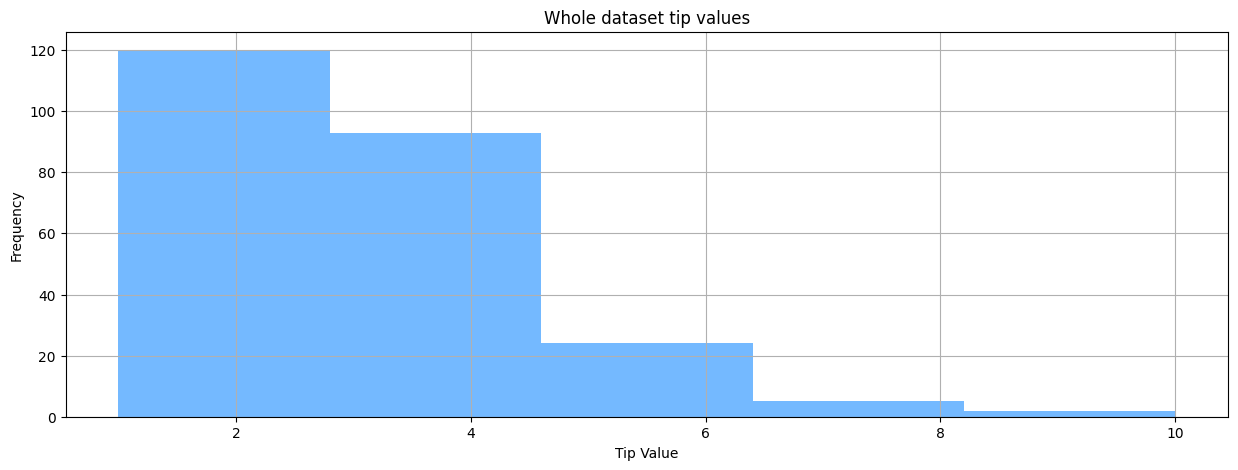

In [119]:
# YOUR CODE
plt.figure(figsize=(15,5))

plt.hist(df1.tip, bins=5, color='#74b9ff')

plt.xlabel('Tip Value')
plt.ylabel('Frequency')
plt.title('Whole dataset tip values')

plt.grid(True)
plt.show()

##### **🕑 Dinner tips histogram**

Plot the histogram for dinners tips distribution.

<u>Use the following settings:</u>
* Size: `15 x 5`
* Color: `#ff7675`
* X-axis label: `Tip value`
* Y-axis label: `Frequency`
* Chart title: `Dinners tip values`
* Gridlines: `show`

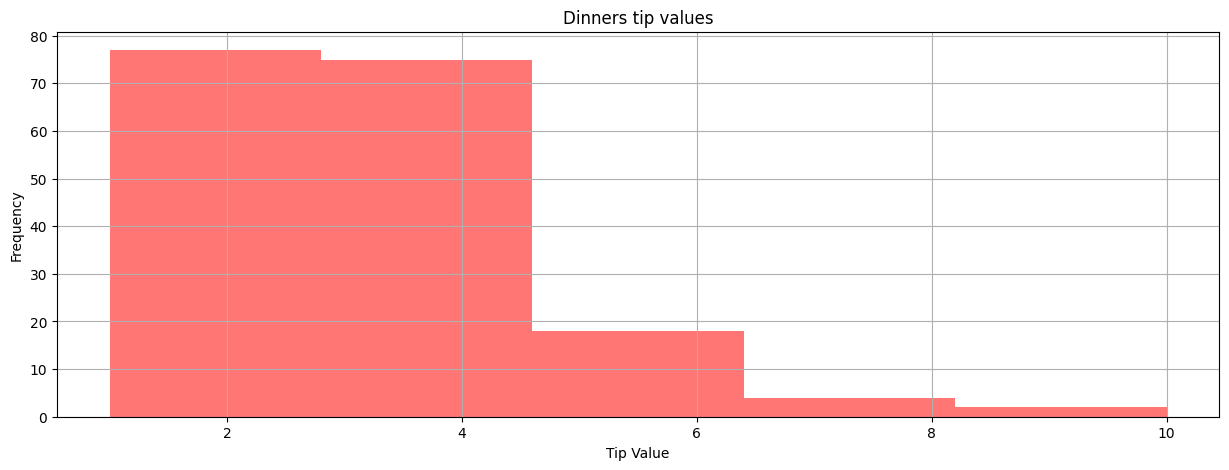

In [120]:
# YOUR CODE
plt.figure(figsize=(15,5))

plt.hist(dinner_df.tip, bins=5, color='#ff7675')

plt.xlabel('Tip Value')
plt.ylabel('Frequency')
plt.title('Dinners tip values')

plt.grid(True)
plt.show()

##### **🕑 Lunch tips histogram**

Plot the histogram for lunch tips distribution.

<u>Use the following settings:</u>
* Size: `15 x 5`
* Color: `#55efc4`
* X-axis label: `Tip value`
* Y-axis label: `Frequency`
* Chart title: `Lunches tip values`
* Gridlines: `show`

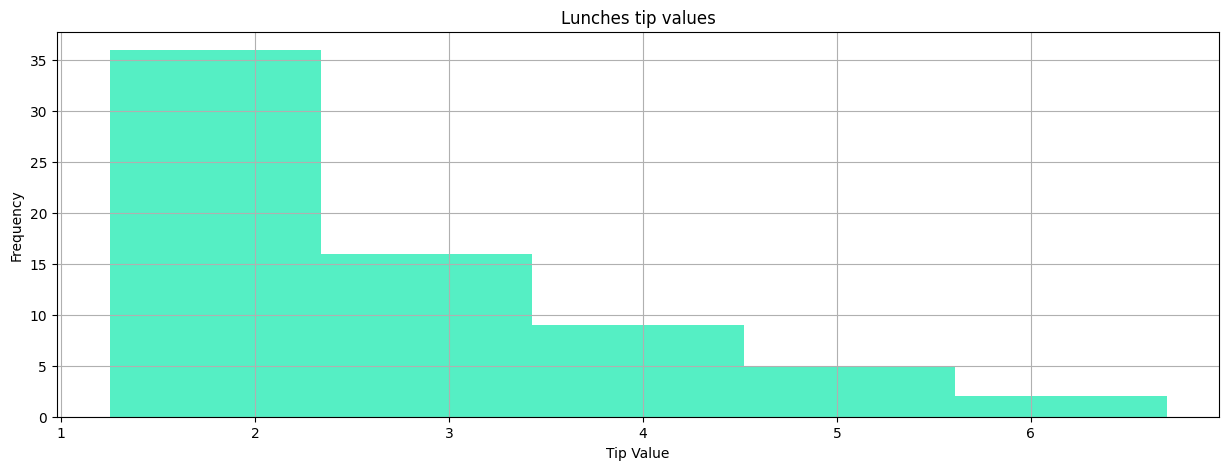

In [121]:
# YOUR CODE
plt.figure(figsize=(15,5))

plt.hist(lunch_df.tip, bins=5, color='#55efc4')

plt.xlabel('Tip Value')
plt.ylabel('Frequency')
plt.title('Lunches tip values')

plt.grid(True)
plt.show()

##### **⭐ Extra-task with a higher difficulty**

Plot all 3 charts in a row in the same cell:

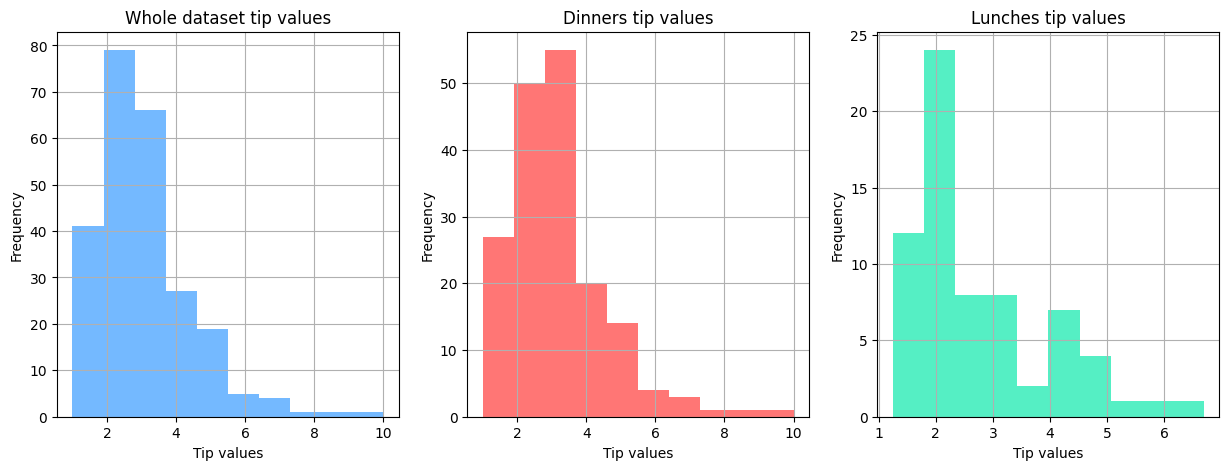

In [122]:
# YOUR CODE HERE

figure, axis = plt.subplots(1, 3, figsize=(15, 5))

axis[0].hist(df1['tip'], color='#74b9ff')
axis[0].set_xlabel('Tip values')
axis[0].set_ylabel('Frequency')
axis[0].set_title('Whole dataset tip values')
axis[0].grid(True)

axis[1].hist(dinner_df['tip'], color='#ff7675')
axis[1].set_xlabel('Tip values')
axis[1].set_ylabel('Frequency')
axis[1].set_title('Dinners tip values')
axis[1].grid(True)

axis[2].hist(lunch_df['tip'], color='#55efc4')
axis[2].set_xlabel('Tip values')
axis[2].set_ylabel('Frequency')
axis[2].set_title('Lunches tip values')
axis[2].grid(True)

plt.show()

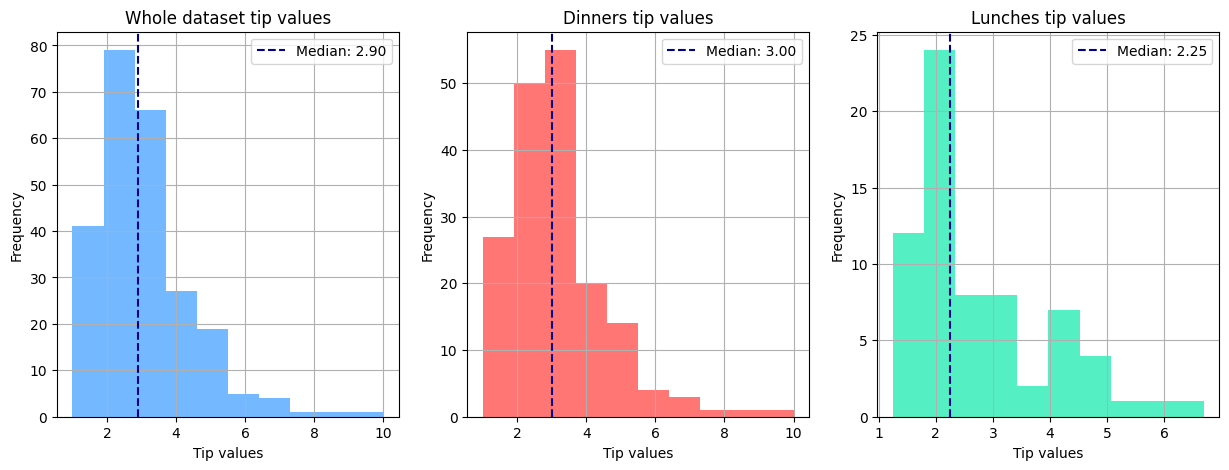

In [123]:
# ADDING THE MEDIAN LINE

figure, axis = plt.subplots(1, 3, figsize=(15, 5))

axis[0].hist(df1['tip'], color='#74b9ff')
axis[0].axvline(df1['tip'].median(), color='darkblue', linestyle='--', label=f'Median: {df1["tip"].median():.2f}')
axis[0].set_xlabel('Tip values')
axis[0].set_ylabel('Frequency')
axis[0].set_title('Whole dataset tip values')
axis[0].grid(True)
axis[0].legend()

axis[1].hist(dinner_df['tip'], color='#ff7675')
axis[1].axvline(dinner_df['tip'].median(), color='darkblue', linestyle='--', label=f'Median: {dinner_df["tip"].median():.2f}')
axis[1].set_xlabel('Tip values')
axis[1].set_ylabel('Frequency')
axis[1].set_title('Dinners tip values')
axis[1].grid(True)
axis[1].legend()

axis[2].hist(lunch_df['tip'], color='#55efc4')
axis[2].axvline(lunch_df['tip'].median(), color='darkblue', linestyle='--', label=f'Median: {lunch_df["tip"].median():.2f}')
axis[2].set_xlabel('Tip values')
axis[2].set_ylabel('Frequency')
axis[2].set_title('Lunches tip values')
axis[2].grid(True)
axis[2].legend()

plt.show()

##### **📝 Conclusion**

**Insights based on distribution comparison:**

---

1. Dinner tips: Both mean (3.10) and median (3.00) are higher than the overall values. => Indicates that customers tip more generously during dinner.
2. Lunch tips: Both mean (2.73) and median (2.25) are lower than dinners and the overall dataset. => Indicates that lunch tips are generally smaller and more variable.

**General conclusion:**
* Dinner service yields higher and more consistent tips.
* Lunch service shows lower tipping behavior, possibly due to shorter or less formal meals.